# Titanic disaster classifier using artificial neural networks
This analysis is for practice purporses. The objective is classify if somebody will survive or no depending several varaibles

## Importing libraries and data

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
train = pd.read_csv("train.csv", header = 0, index_col = 0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test = pd.read_csv("test.csv", header = 0, index_col = 0)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Cabin, Ticket and Name column have no relevant information

In [36]:
del train["Cabin"]
del train["Ticket"]
del train["Name"]

In [37]:
del test["Cabin"]
del test["Ticket"]
del test["Name"]

## Missing values treatment

In [38]:
train.fillna(train.mean(), inplace = True)

In [39]:
test.fillna(test.mean(), inplace = True)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [41]:
train.Embarked[train.Embarked.isna()] = train.Embarked.mode()[0]

<ipython-input-41-a3f7ec350c93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Embarked[train.Embarked.isna()] = train.Embarked.mode()[0]


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


## Dummy variable creation

In [44]:
train = pd.get_dummies(train, drop_first = True)

In [45]:
test = pd.get_dummies(test, drop_first = True)

In [46]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


## Curious data from this dataset

C:\Users\Rolando\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex_male', ylabel='count'>

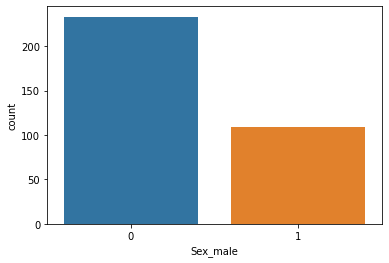

In [52]:
sns.countplot(train.Sex_male[train.Survived == 1])

More women had survived than men (like the movie)

C:\Users\Rolando\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

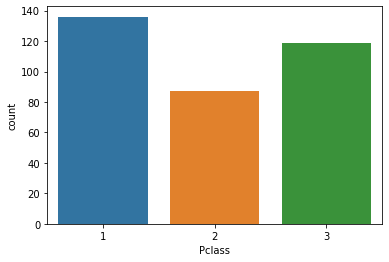

In [53]:
sns.countplot(train.Pclass[train.Survived == 1])

People from first class survived more than the other, but there is no a big difference

<AxesSubplot:xlabel='Age', ylabel='count'>

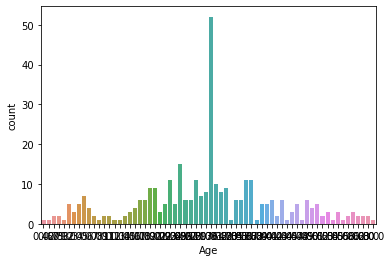

In [58]:
sns.countplot(x = train.Age[train.Survived == 1])

We can see a normal distribution from the Age column with a big peak by missing value treatment

## Train and validation data split

In [64]:
trainx = train.loc[:, train.columns != "Survived"]

In [65]:
trainy = train["Survived"]

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainx_s = scaler.fit_transform(trainx)
test_s = scaler.transform(test)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(trainx_s, trainy, test_size = 0.15, random_state = 0)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(757, 8) (134, 8) (757,) (134,)


## ANN creation

In [224]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Input, Dense, concatenate

### Sequential first

In [205]:
np.random.seed(42)
tf.random.set_seed(42)

In [206]:

seq = keras.models.Sequential([
    Dense(128, activation = "relu",input_shape = [8]),
    Dense(128, activation = "relu"),
    Dense(2, activation = "softmax")
])


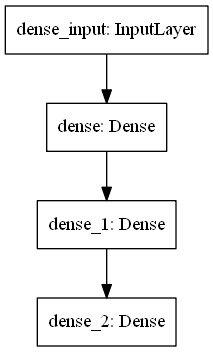

In [207]:
keras.utils.plot_model(seq)

In [208]:
cblist = [keras.callbacks.EarlyStopping(patience = 50,
                                       restore_best_weights = True),
         keras.callbacks.ModelCheckpoint("earlypy.h5", save_best_only = True)]

In [209]:
seq.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["accuracy"])

In [210]:
histseq = seq.fit(x = x_train, y = y_train, epochs = 1000, batch_size = 1,
                 validation_data = (x_valid, y_valid),
                 callbacks = cblist)

Epoch 1/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.6591 - accuracy: 0.6378 - val_loss: 0.5505 - val_accuracy: 0.7836
Epoch 2/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7908 - val_loss: 0.4823 - val_accuracy: 0.7985
Epoch 3/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.4919 - accuracy: 0.8006 - val_loss: 0.4469 - val_accuracy: 0.7910
Epoch 4/1000
757/757 [==============================] - 1s 976us/step - loss: 0.4758 - accuracy: 0.8006 - val_loss: 0.4274 - val_accuracy: 0.8134
Epoch 5/1000
757/757 [==============================] - 1s 1000us/step - loss: 0.4537 - accuracy: 0.7980 - val_loss: 0.4166 - val_accuracy: 0.8060
Epoch 6/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.4196 - accuracy: 0.8093 - val_loss: 0.4091 - val_accuracy: 0.7985
Epoch 7/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.4230 - accuracy: 0.8104 - val_loss: 0.4040 - val_accu

757/757 [==============================] - 1s 983us/step - loss: 0.3752 - accuracy: 0.8462 - val_loss: 0.4032 - val_accuracy: 0.8134
Epoch 58/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.3727 - accuracy: 0.8461 - val_loss: 0.3965 - val_accuracy: 0.8209
Epoch 59/1000
757/757 [==============================] - 1s 955us/step - loss: 0.3642 - accuracy: 0.8565 - val_loss: 0.3964 - val_accuracy: 0.8134
Epoch 60/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.8627 - val_loss: 0.3974 - val_accuracy: 0.8060
Epoch 61/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.3256 - accuracy: 0.8789 - val_loss: 0.3973 - val_accuracy: 0.8134
Epoch 62/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.4035 - accuracy: 0.8258 - val_loss: 0.3983 - val_accuracy: 0.8060
Epoch 63/1000
757/757 [==============================] - 1s 1ms/step - loss: 0.4044 - accuracy: 0.8181 - val_loss: 0.4004 - val_accuracy: 0.

In [211]:
del seq
keras.backend.clear_session()

In [212]:
bestseq = keras.models.load_model("earlypy.h5")

In [213]:
pred = bestseq.predict_classes(test)

C:\Users\Rolando\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [214]:
tocsv = {"PassengerId": test.index, "Survived": pred}

In [215]:
submission = pd.DataFrame(tocsv)
submission.head(1)

,PassengerId,Survived
0,892,0


In [216]:
submission.to_csv("submissionseq.csv", index = False)

In [217]:
keras.backend.clear_session()

## Functional creation

In [238]:
np.random.seed(42)
tf.random.set_seed(42)

In [239]:
input1 = Input(shape = 8)
hidden1 = Dense(128, activation = "relu")(input1)
hidden2 = Dense(128, activation = "relu")(input1)
hidden3 = Dense(128, activation = "relu")(hidden1)
hidden4 = Dense(128, activation = "relu")(hidden2)
concat = concatenate([hidden3, hidden4])
output = Dense(2, activation = "softmax")(concat)
func = keras.models.Model(inputs = [input1], outputs = [output])

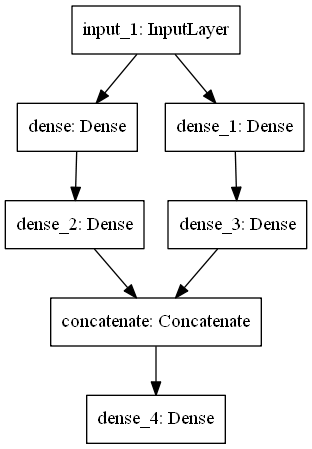

In [240]:
keras.utils.plot_model(func)

In [241]:
func.compile(loss = "sparse_categorical_crossentropy",
            optimizer = keras.optimizers.SGD(lr = 1e-3),
            metrics = ["accuracy"])

In [242]:
cblist2 = [keras.callbacks.EarlyStopping(patience = 50,
                                       restore_best_weights = True),
         keras.callbacks.ModelCheckpoint("earlypy2.h5", save_best_only = True)]

In [244]:
histfunc = func.fit(x = x_train, y = y_train, epochs = 1000,
                 validation_data = (x_valid, y_valid),
                 callbacks = cblist2)

Epoch 1/1000
24/24 [==============================] - 1s 12ms/step - loss: 0.7137 - accuracy: 0.4355 - val_loss: 0.7110 - val_accuracy: 0.4552
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.4186 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4491 - val_loss: 0.6912 - val_accuracy: 0.5224
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6071 - val_loss: 0.6824 - val_accuracy: 0.6119
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.6413 - val_loss: 0.6744 - val_accuracy: 0.6418
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6738 - val_loss: 0.6671 - val_accuracy: 0.6791
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.6815 - val_loss: 0.6602 - val_accuracy: 0.6940
Epoch

24/24 [==============================] - 0s 3ms/step - loss: 0.5106 - accuracy: 0.7950 - val_loss: 0.5063 - val_accuracy: 0.8134
Epoch 59/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.8038 - val_loss: 0.5048 - val_accuracy: 0.8134
Epoch 60/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.8102 - val_loss: 0.5033 - val_accuracy: 0.8134
Epoch 61/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.8178 - val_loss: 0.5018 - val_accuracy: 0.8134
Epoch 62/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7872 - val_loss: 0.5003 - val_accuracy: 0.8209
Epoch 63/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7862 - val_loss: 0.4989 - val_accuracy: 0.8209
Epoch 64/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8269 - val_loss: 0.4975 - val_accuracy: 0.8209
Epoch 65/1000

24/24 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8166 - val_loss: 0.4508 - val_accuracy: 0.8060
Epoch 116/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4457 - accuracy: 0.8220 - val_loss: 0.4502 - val_accuracy: 0.8060
Epoch 117/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.8201 - val_loss: 0.4496 - val_accuracy: 0.8060
Epoch 118/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7979 - val_loss: 0.4490 - val_accuracy: 0.8060
Epoch 119/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4518 - accuracy: 0.8086 - val_loss: 0.4485 - val_accuracy: 0.8060
Epoch 120/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8247 - val_loss: 0.4480 - val_accuracy: 0.8060
Epoch 121/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8034 - val_loss: 0.4474 - val_accuracy: 0.8060
Epoch 1

Epoch 172/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.8310 - val_loss: 0.4273 - val_accuracy: 0.7910
Epoch 173/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.8117 - val_loss: 0.4270 - val_accuracy: 0.7910
Epoch 174/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.8150 - val_loss: 0.4267 - val_accuracy: 0.7910
Epoch 175/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4177 - accuracy: 0.8307 - val_loss: 0.4264 - val_accuracy: 0.7910
Epoch 176/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4249 - accuracy: 0.8145 - val_loss: 0.4262 - val_accuracy: 0.7910
Epoch 177/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.8060 - val_loss: 0.4259 - val_accuracy: 0.7910
Epoch 178/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8127 - val_loss: 0.4256 - val_accuracy:

Epoch 229/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.8287 - val_loss: 0.4152 - val_accuracy: 0.7910
Epoch 230/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.7924 - val_loss: 0.4150 - val_accuracy: 0.7910
Epoch 231/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.8113 - val_loss: 0.4149 - val_accuracy: 0.7985
Epoch 232/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8112 - val_loss: 0.4147 - val_accuracy: 0.7985
Epoch 233/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8095 - val_loss: 0.4146 - val_accuracy: 0.7985
Epoch 234/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8238 - val_loss: 0.4144 - val_accuracy: 0.7985
Epoch 235/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4127 - accuracy: 0.8219 - val_loss: 0.4142 - val_accuracy:

24/24 [==============================] - 0s 4ms/step - loss: 0.4346 - accuracy: 0.8078 - val_loss: 0.4083 - val_accuracy: 0.8060
Epoch 286/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8353 - val_loss: 0.4083 - val_accuracy: 0.8060
Epoch 287/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8127 - val_loss: 0.4082 - val_accuracy: 0.8060
Epoch 288/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8233 - val_loss: 0.4081 - val_accuracy: 0.8060
Epoch 289/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8248 - val_loss: 0.4080 - val_accuracy: 0.8060
Epoch 290/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8192 - val_loss: 0.4079 - val_accuracy: 0.8060
Epoch 291/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8047 - val_loss: 0.4078 - val_accuracy: 0.8060
Epoch 2

Epoch 342/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8197 - val_loss: 0.4039 - val_accuracy: 0.7910
Epoch 343/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8104 - val_loss: 0.4039 - val_accuracy: 0.7910
Epoch 344/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8173 - val_loss: 0.4038 - val_accuracy: 0.7985
Epoch 345/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.8189 - val_loss: 0.4038 - val_accuracy: 0.7985
Epoch 346/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.8494 - val_loss: 0.4037 - val_accuracy: 0.7985
Epoch 347/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8336 - val_loss: 0.4036 - val_accuracy: 0.7985
Epoch 348/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8296 - val_loss: 0.4036 - val_accuracy:

Epoch 399/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8179 - val_loss: 0.4010 - val_accuracy: 0.7910
Epoch 400/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8372 - val_loss: 0.4010 - val_accuracy: 0.7910
Epoch 401/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8294 - val_loss: 0.4010 - val_accuracy: 0.7910
Epoch 402/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8288 - val_loss: 0.4009 - val_accuracy: 0.7910
Epoch 403/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8279 - val_loss: 0.4009 - val_accuracy: 0.7910
Epoch 404/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8334 - val_loss: 0.4009 - val_accuracy: 0.7910
Epoch 405/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.8232 - val_loss: 0.4008 - val_accuracy:

Epoch 456/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8293 - val_loss: 0.3991 - val_accuracy: 0.7985
Epoch 457/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.7985
Epoch 458/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8309 - val_loss: 0.3991 - val_accuracy: 0.7985
Epoch 459/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8316 - val_loss: 0.3991 - val_accuracy: 0.7985
Epoch 460/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8095 - val_loss: 0.3991 - val_accuracy: 0.7985
Epoch 461/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8460 - val_loss: 0.3990 - val_accuracy: 0.7985
Epoch 462/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.8348 - val_loss: 0.3990 - val_accuracy:

Epoch 513/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.8384 - val_loss: 0.3977 - val_accuracy: 0.8060
Epoch 514/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.8322 - val_loss: 0.3977 - val_accuracy: 0.8134
Epoch 515/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3914 - accuracy: 0.8344 - val_loss: 0.3977 - val_accuracy: 0.8134
Epoch 516/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8434 - val_loss: 0.3977 - val_accuracy: 0.8134
Epoch 517/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3794 - accuracy: 0.8484 - val_loss: 0.3977 - val_accuracy: 0.8134
Epoch 518/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8437 - val_loss: 0.3977 - val_accuracy: 0.8134
Epoch 519/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4238 - accuracy: 0.8335 - val_loss: 0.3977 - val_accuracy:

Epoch 570/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8150 - val_loss: 0.3968 - val_accuracy: 0.8134
Epoch 571/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8532 - val_loss: 0.3967 - val_accuracy: 0.8134
Epoch 572/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8475 - val_loss: 0.3967 - val_accuracy: 0.8134
Epoch 573/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8503 - val_loss: 0.3967 - val_accuracy: 0.8134
Epoch 574/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8452 - val_loss: 0.3967 - val_accuracy: 0.8134
Epoch 575/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4099 - accuracy: 0.8272 - val_loss: 0.3967 - val_accuracy: 0.8134
Epoch 576/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8561 - val_loss: 0.3967 - val_accuracy:

Epoch 627/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8508 - val_loss: 0.3962 - val_accuracy: 0.8134
Epoch 628/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8326 - val_loss: 0.3962 - val_accuracy: 0.8134
Epoch 629/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.8668 - val_loss: 0.3962 - val_accuracy: 0.8134
Epoch 630/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3570 - accuracy: 0.8777 - val_loss: 0.3962 - val_accuracy: 0.8134
Epoch 631/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8277 - val_loss: 0.3962 - val_accuracy: 0.8134
Epoch 632/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3731 - accuracy: 0.8595 - val_loss: 0.3961 - val_accuracy: 0.8134
Epoch 633/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8390 - val_loss: 0.3962 - val_accuracy:

Epoch 684/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4030 - accuracy: 0.8418 - val_loss: 0.3957 - val_accuracy: 0.8134
Epoch 685/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8368 - val_loss: 0.3957 - val_accuracy: 0.8134
Epoch 686/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8548 - val_loss: 0.3957 - val_accuracy: 0.8134
Epoch 687/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8786 - val_loss: 0.3957 - val_accuracy: 0.8134
Epoch 688/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8373 - val_loss: 0.3957 - val_accuracy: 0.8134
Epoch 689/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8517 - val_loss: 0.3957 - val_accuracy: 0.8134
Epoch 690/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.8454 - val_loss: 0.3957 - val_accuracy:

Epoch 741/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8534 - val_loss: 0.3953 - val_accuracy: 0.8134
Epoch 742/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3823 - accuracy: 0.8444 - val_loss: 0.3953 - val_accuracy: 0.8134
Epoch 743/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8567 - val_loss: 0.3953 - val_accuracy: 0.8134
Epoch 744/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8639 - val_loss: 0.3953 - val_accuracy: 0.8134
Epoch 745/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8569 - val_loss: 0.3953 - val_accuracy: 0.8134
Epoch 746/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8539 - val_loss: 0.3953 - val_accuracy: 0.8134
Epoch 747/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8464 - val_loss: 0.3953 - val_accuracy:

Epoch 798/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8330 - val_loss: 0.3951 - val_accuracy: 0.8134
Epoch 799/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8457 - val_loss: 0.3951 - val_accuracy: 0.8134
Epoch 800/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8604 - val_loss: 0.3951 - val_accuracy: 0.8134
Epoch 801/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8419 - val_loss: 0.3952 - val_accuracy: 0.8134
Epoch 802/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.8522 - val_loss: 0.3952 - val_accuracy: 0.8134
Epoch 803/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8548 - val_loss: 0.3951 - val_accuracy: 0.8134
Epoch 804/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8422 - val_loss: 0.3951 - val_accuracy:

Epoch 855/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8561 - val_loss: 0.3951 - val_accuracy: 0.8134
Epoch 856/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8578 - val_loss: 0.3951 - val_accuracy: 0.8134
Epoch 857/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.8442 - val_loss: 0.3951 - val_accuracy: 0.8134
Epoch 858/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8532 - val_loss: 0.3952 - val_accuracy: 0.8134
Epoch 859/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8650 - val_loss: 0.3952 - val_accuracy: 0.8134
Epoch 860/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8444 - val_loss: 0.3952 - val_accuracy: 0.8134
Epoch 861/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8570 - val_loss: 0.3952 - val_accuracy:

In [245]:
del func
keras.backend.clear_session()

In [246]:
bestfunc = keras.models.load_model("earlypy2.h5")

In [268]:
pred2 = (bestfunc.predict(test)[:,1] > 0.5).astype("int32")
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [269]:
tocsv2 = {"PassengerId": test.index, "Survived": pred2}

In [270]:
submission2 = pd.DataFrame(tocsv2)
submission2.head(1)

,PassengerId,Survived
0,892,0


In [271]:
submission2.to_csv("submissionseq2.csv", index = False)

In [272]:
keras.backend.clear_session()